### Conjunto de dados e problema
Consideramos nesse trabalho o dataset criado e usado no artigo ["Machine Learning for First-Order Theorem Proving" (Bridge, Holden, & Paulson, 2014)](https://link.springer.com/article/10.1007/s10817-014-9301-5), obtido através do [repositório de aprendizado de máquina da UCI](http://archive.ics.uci.edu/ml/datasets/First-order+theorem+proving).

Nesse artigo os autores apresentam a dificuldade, no uso de um provador automático de teoremas de primeira ordem, de selecionar a melhor heurística para provar o teorema em questão. A melhor heurística a ser usada vai depender das formas da conjectura a ser provada e dos axiomas dados. Porém, o relacionamento entre essas formas e a melhor heurítica a ser usada não é obvia, mesmo para aqueles com experiência extensiva com uso de provadores automáticos.

Portando, os autores propõe determinar a melhor heurística a ser usada a partir de certas características extraídas da conjectura e dos axiomas; e fazê-lo de forma automática, com o uso de aprendizado de máquina.
    
Para isso, foram escolhidos 6118 problemas de demonstrações de primeira ordem da biblioteca TPTP (Thousands of Problems for Theorem Provers), descrita em ["The TPTP problem library and associated infrastructure" (Sutcliffe, 2009)](https://link.springer.com/article/10.1007/s10817-009-9143-8), e foi usado [E (versão 0.99 Singtom)](https://wwwlehre.dhbw-stuttgart.de/~sschulz/E/E.html), um provador automático de alta performance para lógica de primeira ordem completa com igualdade. Das 82 heurísticas incluídas nesse provador, foram escolhidas as cinco mais frequentemente selecionados pelo E para os problemas da TPTP, diminuindo o esforço de construção e uso do dataset.

O objetivo então é selecionar para cada um dos problemas qual das cinco heuríticas em consideração (H1, ..., H5) é a melhor, onde uma heurística é melhor que outra se leva a uma demonstração mais rapidamente em E. Uma "heurística" adicional (H0) é considerada, a ser selecionada quando nenhuma das outras heurísticas produz uma demonstração dentro do tempo limite de 100 segundos de CPU.

### Atributos
Os atributos escolhidas pelos autores para realizar essa tarefa de aprendizado podem ser divididas em dois tipos: atributos estáticos e atributos dinâmicos. Enquanto atributos estáticos são características que podem ser extraídas somente da descrição do problema (sua conjectura e seus axiomas), atributos dinâmicos são obtidos a partir de características de cláusulas geradas nos estágios iniciais de uma demonstração automática.
Descrevemos abaixo alguns dos 14 atributos estáticos, para exemplificação. Os 39 atributos dinâmicos seguem formas similares, e detalhes podem ser obtidos de Bridge et al., 2014.

1\. Fração de cláusulas que são _unit clauses_ (consiste de exatamente um literal)<br>
2\. Fração de cláusulas que são _Horn clauses_ (contêm no máximo um literal não-negado)<br>
7\. Fração de cláusulas que são puramente negativas<br>
9\. Comprimento de clásula máximo<br>
10\. Comprimento de clásula médio<br>
11\. Profundidade de cláusula máxima.<br>
13\. Peso de cláusula máximo.<br>

Todos os 53 atributos são numéricos, sendo os atributos 9, 11, e 13 discretos e o restante contínuo. Não há valores faltosos para nenhum dos atributos, em nenhuma das amostras.

### Ferramentas utilizadas
Usaremos em todas as estapas desse trabalho a linguagem Python, pelas diversas bibliotecas disponíveis nela que facilitam manipulação de dados, tarefas de aprendizado de máquina, e afins. Mais especificamente, usaremos as bibliotecas Pandas e Numpy, que contêm ferramentas de análise de dados, e provêm estruturas de dados e operações para manipulá-las úteis para trabalhar com dados multi-dimensionais.

Quanto aos algoritmos, usaremos principalmente a biblioteca de aprendizado de máquina scikit-learn, que oferece algoritmos de aprendizado como K-nearest neighbors, e árvores de decisão; métodos de redução de dimensionalidade como _principal component analysis_ (PCA), e _linear discriminant analysis_ (LDA); e funções de validação e métricas de classificação. Além disso, usamos as bibliotecas pyswarms e pyeasyga pelas suas implementações de _particle swarm optimization_ (PSO) e de algoritmo genético, respectivamente.

### Ingestão e pre-processamento de dados
O dataset inicialmente contém, além dos 53 atributos, 5 colunas indicando o tempo que cada heurística levou para chegar a uma demonstração para cada problema, ou -100 caso o tempo limite tenha sido atingido antes disso. Verificamos primeiramente as dimensões dos dados: 6118 instâncias e 58 colunas (53 atributos e 5 heurísticas), e então visualizamos as primeiras instâncias no conjunto de dados. Note que colunas de atributos estão numeradas de 0 a 52, e as colunas com os tempos de cada heurística de 53 a 57.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/all-data-raw.csv", header=None)
print(df.shape)
df.head()

(6118, 58)


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,...,0.73684,0.00188,0.73872,0.073308,0.18797,-100.00,-100.00,-100.0,-100.00,-100.00
1,0.83307,0.99682,0.83307,0.76948,0,0.77107,0.068363,0.16057,6,1.2734,...,0.74248,0.00188,0.74436,0.067669,0.18797,0.08,0.08,0.2,0.08,0.08
2,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,...,0.74060,0.00188,0.74248,0.069549,0.18797,-100.00,-100.00,-100.0,-100.00,-100.00
3,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,...,0.72932,0.00188,0.73120,0.080827,0.18797,-100.00,-100.00,-100.0,-100.00,-100.00
4,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,...,0.73120,0.00188,0.73308,0.078947,0.18797,-100.00,-100.00,-100.0,-100.00,-100.00


Como apenas nos interessa para essa tarefa qual foi a melhor heurística para cada um, transformamos os dataset para refletir isso, após importá-lo, adicionando uma coluna "heuristic" com valores de 0 a 5 refletindo quais das heurísticas é a melhor para cada amostra (1 a 5) ou se nenhuma é suficiente (0).

In [2]:
def best_heuristic(row, time_cols):
    n_heuristics = 5
    h_times = row[time_cols].reset_index(drop=True)
    h_times.replace({-100.0 : np.nan}, inplace=True)
    idx, min_time = h_times.idxmin(), h_times.min()
    if np.isnan(min_time):
       return 0
    else:
       return idx+1

time_cols = list(range(53, 58))
df['heuristic'] = df.apply(lambda r : best_heuristic(r, time_cols), axis=1)
df.drop(time_cols, axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,heuristic
0,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,...,0.020202,0.80639,0.99624,0.80263,0.73684,0.00188,0.73872,0.073308,0.18797,0
1,0.83307,0.99682,0.83307,0.76948,0,0.77107,0.068363,0.16057,6,1.2734,...,0.020202,0.80639,0.99624,0.80263,0.74248,0.00188,0.74436,0.067669,0.18797,1
2,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,...,0.020202,0.80639,0.99624,0.80263,0.74060,0.00188,0.74248,0.069549,0.18797,0
3,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,...,0.020202,0.80639,0.99624,0.80263,0.72932,0.00188,0.73120,0.080827,0.18797,0
4,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,...,0.020202,0.80639,0.99624,0.80263,0.73120,0.00188,0.73308,0.078947,0.18797,0


A partir de agora dividimos os dados entre X e y, representando respectivamente a matriz de atributos e o vetor de _labels_ (nesse caso, a melhor heurística).

In [3]:
X, y = df.drop(['heuristic'], axis=1).astype('float64'), df['heuristic']

Podemos observar então, abaixo, na frequência com que cada heurística foi a melhor para uma certa instância, um certo desbalanceamento de classes. Enquanto a classe 0 é a mais frequente, com 2554 instâncias, classe 2 é a menos, com 486.

In [4]:
y.value_counts().sort_index()

0    2554
1    1089
2     486
3     748
4     617
5     624
Name: heuristic, dtype: int64

Abaixo, podemos ter uma noção também da distribuição de cada atributo. Note que os atributos 5 e 35 (aqui numerados 4 e 34) são constantes: no artigo original os autores optaram por eliminar esses dois atributos, mas para os propósitos desse trabalho, deixamos todos e observaremos se cada um dos métodos de seleção de atributos elimina ou mantêm esses.

In [5]:
X.describe().transpose()[['mean', 'std', 'min', 'max']]

,mean,std,min,max
0,0.367852,0.313888,0.000000,1.00000
1,0.830860,0.213030,0.007812,1.00000
2,0.264259,0.268266,0.000000,1.00000
3,0.300741,0.263988,0.000000,1.00000
4,0.000000,0.000000,0.000000,0.00000
5,0.357758,0.269641,0.000382,1.00000
6,0.106189,0.119298,0.000000,0.98214
7,0.536053,0.302384,0.000000,0.99660
8,7.081399,7.303454,1.000000,244.00000
9,2.640024,2.274133,1.000000,39.07000


Podemos observar também o valor absoluto da correlação de Pearson entre cada atributo e a _label_, que será mais tarde usada para seleção de atributos com o algoritmo genético e o de PSO.

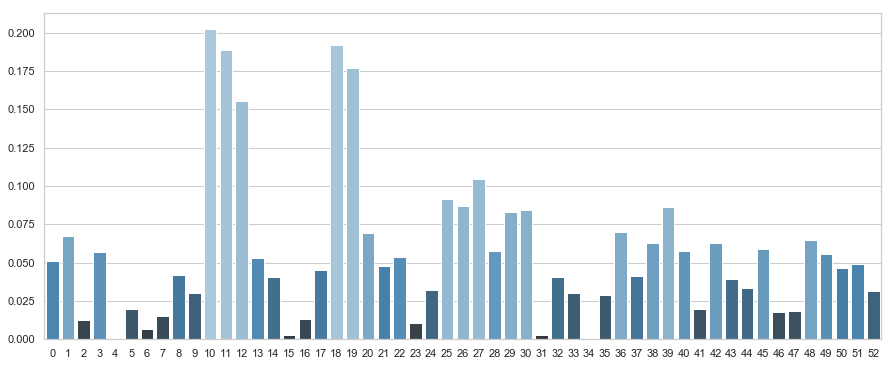

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

corr = abs(X.corrwith(y))

palette = np.array(sns.color_palette("Blues_d", len(corr)))
rank = np.array(corr.rank().fillna(0), dtype=int)

f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=corr.index, y=corr, palette=palette[rank])

plt.show()

### Conjunto de validação e normalização

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

random_seed = 42

X, X_val, y, y_val = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=random_seed)

scaler = StandardScaler()
X.update(scaler.fit_transform(X))
X_val.update(scaler.transform(X_val))

Nessa sessão utilizamos os dois classificadores que serão utilizados para os métodos de extratificação e filtragem dos _features_. O _K-Nearest Neighbors_ (KNN) e a _Decision Tree_ (DT), com as implementações fornecida pelo pacote scikit-learn. Mais informações sobre a implementação podem ser acessados nos links:

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

http://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart

Utilizamos o _Stratified K-fold_ que é uma metodologia de validação cruzada com k divisões conjuntos de treino e teste, para selecionarmos os melhores parâmetros dos algoritmos para os dados e então testamos com o conjunto de validação separado previamente. 

Utilizamos a acurácia como métrica de avaliação dos modelos gerados.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

def base_classifiers(X, y, X_val, y_val):
    classifier_params = {
        KNeighborsClassifier() : {
            'n_neighbors': list(range(1,16)),
            'weights' : ['distance', 'uniform']
        },
        DecisionTreeClassifier() : {
            'criterion': ['gini', 'entropy']
        }
    }

    cv_grid_results = {}
    for classifier, params in classifier_params.items():

        kfold = StratifiedKFold(10, shuffle=True, random_state=random_seed)
        cv_grid = GridSearchCV(classifier, params, scoring='accuracy', 
                               cv=kfold, verbose=1, n_jobs=-1)
        cv_grid.fit(X, y)

        class_ = type(classifier).__name__
        print(class_, cv_grid.best_params_)
        print("10-fold CV mean score: {:.4f}".format(cv_grid.best_score_))
        cv_grid_results[class_] = pd.DataFrame(cv_grid.cv_results_)
        
        best = cv_grid.best_estimator_
        y_pred = best.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        print("final validation score:", accuracy)
        print()
        
base_classifiers(X, y, X_val, y_val)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.5min finished
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecati

KNeighborsClassifier {'n_neighbors': 13, 'weights': 'uniform'}
10-fold CV mean score: 0.4092
final validation score: 0.2761437908496732

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.6s finished


DecisionTreeClassifier {'criterion': 'gini'}
10-fold CV mean score: 0.2864
final validation score: 0.2630718954248366



/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/minicon

In [9]:
from IPython.utils.text import columnize

abs_correlations = abs(X.corrwith(y))
ord_corr = abs_correlations.sort_values(ascending=False)
corr_pretty_list = list(map(lambda x : "{:2} {:.4f}".format(x[0], x[1]), zip(ord_corr.index, ord_corr)))
print(columnize(corr_pretty_list))

10 0.0959  23 0.0248  46 0.0194   7 0.0144  52 0.0108  26 0.0046  30 0.0014
11 0.0634  21 0.0246  20 0.0188  33 0.0140  51 0.0102  31 0.0045   3 0.0003
 8 0.0609  32 0.0229  36 0.0184  44 0.0139  45 0.0098  15 0.0040  47 0.0001
12 0.0358  14 0.0229  40 0.0177  24 0.0137  18 0.0088  49 0.0038   4 nan   
25 0.0342  28 0.0225  39 0.0174  19 0.0136   2 0.0067  16 0.0034  34 nan   
29 0.0286  42 0.0223  43 0.0165  50 0.0128  35 0.0059  22 0.0033
 9 0.0271  17 0.0211  27 0.0164   5 0.0116  48 0.0056   0 0.0032
13 0.0257  38 0.0205   1 0.0153  37 0.0109  41 0.0049   6 0.0022



### Genetic
Utilizando a biblioteca pyeasyga, fizemos uso do algoritmo evolucionário genético para selecionar os atributos com base na função de correlação dos atributos com os _targets_, tentando maximizar a correlação média dos atributos como sugerido em sala de aula. Para cara configuração foram executados 10 vezes. Também executamos uma vez utilizando a acurácia de um modelo _KNN_ com  k = 5 e distancia simples,  dentro de cada individuo, desse modo queremos maximizar a acurácia do modelo e depois testamos com os demais parâmetros

In [11]:
from pyeasyga import pyeasyga
from itertools import compress

def fitness_corr(individual, idx_corr):
    fitness = 0
    n = individual.count(1)
    if n > 0:
        fitness = sum(corr for idx, corr in compress(idx_corr, individual))
        fitness /= n
    return fitness

def fitness_knn(individual, X_y):
    X, y = X_y
    fitness = 0
    selected_attrs = list(compress(X.columns, individual))
    if selected_attrs:
        X = X[selected_attrs]
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, stratify=y, test_size=0.3, random_state=random_seed)

        knn = KNeighborsClassifier()
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        fitness = accuracy_score(y_test, y_pred)
    return fitness

def genetic(data, fitness_function, generations, rep):
    for _ in range(rep):
        ga = pyeasyga.GeneticAlgorithm(data, generations=generations)

        ga.fitness_function = fitness_function
        ga.run()

        score, individual = ga.best_individual()
        selected_attrs = list(compress(X.columns, individual))
        print(score, len(selected_attrs), selected_attrs)
        print()

        base_classifiers(X[selected_attrs], y, X_val[selected_attrs], y_val)

print("correlation")
abs_correlations = abs(X.corrwith(y)).fillna(0)
idx_corr = list(zip(abs_correlations.index, abs_correlations))
genetic(idx_corr, fitness_corr, 50, 10)

print("knn")
genetic((X, y), fitness_knn, 50, 1)

0.0796442679377862 2 [10, 11]

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   12.3s finished
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score (

KNeighborsClassifier {'n_neighbors': 15, 'weights': 'uniform'}
10-fold CV mean score: 0.4092
final validation score: 0.3741830065359477

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.3s finished
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score

DecisionTreeClassifier {'criterion': 'gini'}
10-fold CV mean score: 0.3400
final validation score: 0.23202614379084968

0.09585096204920003 1 [10]

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    7.0s finished
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score (

KNeighborsClassifier {'n_neighbors': 15, 'weights': 'distance'}
10-fold CV mean score: 0.4175
final validation score: 0.2581699346405229

Fitting 10 folds for each of 2 candidates, totalling 20 fits
DecisionTreeClassifier {'criterion': 'gini'}
10-fold CV mean score: 0.4243
final validation score: 0.2696078431372549



[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score

0.09585096204920003 1 [10]

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.4s finished
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score (

KNeighborsClassifier {'n_neighbors': 15, 'weights': 'distance'}
10-fold CV mean score: 0.4175
final validation score: 0.2581699346405229

Fitting 10 folds for each of 2 candidates, totalling 20 fits
DecisionTreeClassifier {'criterion': 'gini'}
10-fold CV mean score: 0.4243
final validation score: 0.2696078431372549

0.0796442679377862 2 [10, 11]

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.0s finished
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default 

KNeighborsClassifier {'n_neighbors': 15, 'weights': 'uniform'}
10-fold CV mean score: 0.4092
final validation score: 0.3741830065359477

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.4s finished
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score

DecisionTreeClassifier {'criterion': 'entropy'}
10-fold CV mean score: 0.3394
final validation score: 0.238562091503268

0.0650142279751049 2 [10, 25]

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.4s finished
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default 

KNeighborsClassifier {'n_neighbors': 14, 'weights': 'uniform'}
10-fold CV mean score: 0.4123
final validation score: 0.34967320261437906

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.4s finished
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score

DecisionTreeClassifier {'criterion': 'gini'}
10-fold CV mean score: 0.3035
final validation score: 0.21241830065359477

0.09585096204920003 1 [10]

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    7.1s finished
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score (

KNeighborsClassifier {'n_neighbors': 15, 'weights': 'distance'}
10-fold CV mean score: 0.4175
final validation score: 0.2581699346405229

Fitting 10 folds for each of 2 candidates, totalling 20 fits
DecisionTreeClassifier {'criterion': 'gini'}
10-fold CV mean score: 0.4243
final validation score: 0.2696078431372549

0.0796442679377862 2 [10, 11]

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.7s finished
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default 

KNeighborsClassifier {'n_neighbors': 15, 'weights': 'uniform'}
10-fold CV mean score: 0.4092
final validation score: 0.3741830065359477

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.3s finished
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score

DecisionTreeClassifier {'criterion': 'gini'}
10-fold CV mean score: 0.3398
final validation score: 0.23366013071895425

0.07835601650539735 2 [8, 10]

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.7s finished
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score (

KNeighborsClassifier {'n_neighbors': 15, 'weights': 'uniform'}
10-fold CV mean score: 0.4099
final validation score: 0.23366013071895425

Fitting 10 folds for each of 2 candidates, totalling 20 fits
DecisionTreeClassifier {'criterion': 'entropy'}
10-fold CV mean score: 0.4181
final validation score: 0.2434640522875817

0.07835601650539735 2 [8, 10]

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.7s finished
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default 

KNeighborsClassifier {'n_neighbors': 15, 'weights': 'uniform'}
10-fold CV mean score: 0.4099
final validation score: 0.23366013071895425

Fitting 10 folds for each of 2 candidates, totalling 20 fits
DecisionTreeClassifier {'criterion': 'entropy'}
10-fold CV mean score: 0.4181
final validation score: 0.24183006535947713

0.07338320227905569 3 [8, 10, 11]

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.6s finished
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default 

KNeighborsClassifier {'n_neighbors': 15, 'weights': 'uniform'}
10-fold CV mean score: 0.4150
final validation score: 0.27124183006535946

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.3s finished
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score

DecisionTreeClassifier {'criterion': 'gini'}
10-fold CV mean score: 0.3402
final validation score: 0.24836601307189543

0.3710653753026634 2 [0, 1]

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.6s finished
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default 

KNeighborsClassifier {'n_neighbors': 15, 'weights': 'uniform'}
10-fold CV mean score: 0.4177
final validation score: 0.3137254901960784

Fitting 10 folds for each of 2 candidates, totalling 20 fits
DecisionTreeClassifier {'criterion': 'gini'}
10-fold CV mean score: 0.3654
final validation score: 0.3088235294117647



[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.4s finished
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosv/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score

### PSO

Function definition based on reference: https://pyswarms.readthedocs.io/en/latest/examples/feature_subset_selection.html#using-binary-pso
Utilizando a memsma abordagem do algoritmo genético, utilizamos o PSO da biblioteca pyswarms.

In [ ]:
import pyswarms as ps

def f_per_particle_corr(m, alpha):
    if np.count_nonzero(m) == 0:
        return 1
    else:
        X_subset = X.loc[:, m==1]
    P = abs(X_subset.corrwith(y)).sum()
    P /= np.count_nonzero(m) 
    return (alpha * (1.0 - P))

def f_corr(x, alpha = 1.0):
    n_particles = x.shape[0]
    j = [f_per_particle_corr(x[i], alpha) for i in range(n_particles)]
    return np.array(j)

def f_per_particle_knn(m, alpha = 1.0):
    if np.count_nonzero(m) == 0:
        X_subset = X
    else:
        X_subset = X.loc[:, m==1]
    X_train, X_test, y_train, y_test = train_test_split(
        X_subset, y, stratify=y, test_size=0.3)

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return alpha * (1 - accuracy_score(y_test, y_pred))

def f_knn(x, alpha = 1.0):
    n_particles = x.shape[0]
    j = [f_per_particle_knn(x[i], alpha) for i in range(n_particles)]
    return np.array(j)

options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}
dimensions = 53 # dimensions should be the number of features

def pso(cost_function, iters, rep):
    for _ in range(rep):
        optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)

        cost, pos = optimizer.optimize(cost_function, print_step=100, iters=iters, verbose=2)

        selected_attrs = list(compress(X.columns, pos))
        print(cost, len(selected_attrs), selected_attrs)
        print()

        base_classifiers(X[selected_attrs], y, X_val[selected_attrs], y_val)

print("correlation")
pso(f_corr, 1000, 10)
print("knn")
pso(f_knn, 1000, 1)

INFO:pyswarms.discrete.binary:Arguments Passed to Objective Function: {}


correlation


INFO:pyswarms.discrete.binary:Iteration 1/1000, cost: 0.9777906700207722


### PCA

Tendo cada instancia em um espaço m-dimensional,vamos então mapear através de uma transformação linear as imagens do espaço orginalmente m-dimensional em um outro espaço n-dimensional, tal que  n < m. Onde calculamos a média:
    $$ \mu = \frac{1}{k}\sum\limits_{i=1}^kx_i$$
       e a matriz de covariância:
    $$ S = \frac{1}{k}\sum\limits_{i=1}^k(x_i - \mu)(x_i - \mu)^T $$
    
   Para então computar os autovalores $ \lambda_i $ e autovetores $v_i$ da matriz de covariância S:
    $$S v_i = \lambda_iv_i, i = 1,2, \ldots, k $$
    Com isso, podemos ter uma noção da quantidade de informação baseada no quanto cada autovalor representa de informação, divindo cada autovalor pela soma de todos. Ordenando de forma não-crescente, podemos retirar $Z$ componentes, reduzindo a dimensão. Sendo assim, utilizando a matriz $W$ formada pelos $K-Z$ autovetores, podemos aplicar a transformação  na matriz que representa o conjunto de dados, gerando o novo conjunto de descritores.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.96)
pca.fit(X)
print(pca.explained_variance_ratio_)
base_classifiers(pca.transform(X), y, pca.transform(X_val), y_val)

### LDA

Para realizar o LDA, calculamos duas matrizes  $ S_B $ e $ S_W $, respectivamente a matriz de dispersão entre classes e a matriz de dispersão dentro das classes:
    $$S_B = \sum_{i=1}^cM_i(\mu_i - \mu)(\mu_i - \mu)^T$$
    $$S_W = \sum_{i=1}^c\sum_{x \in C_i}(x - \mu_i)(x - \mu_i)^T$$
onde $X = {x_1, x_2, \ldots, x_n}$ e $C = C_1, C_2, \ldots, C_c$, representando as instancias x e as classses C's e:
$$\mu_i = \frac{1}{M_i}\sum_{x \in C_i}x\]\[\mu =\frac{1}{M}\sum_{k=1}^M x_k$$

	Se $S_W$ for não singular, a matriz $W_{opt}$ é o operador de projeção linear ótimo, maximizando  a razão entre os determinantes das matrizes \(S_B \) e $S_W$
    $$W_{opt} = arg max_w\frac{|W^TS_BW|}{|W^TS_WW|}$$
    
    Espefificando a quantidade de autovetores para \(|C|\), ou seja, a quantidade de classes

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X,y)
base_classifiers(lda.transform(X), y, lda.transform(X_val), y_val)

### Filtro

In [ ]:
base_classifiers(X.iloc[:, :14], y, X_val.iloc[:, :14], y_val)